# Correlation All Predictors

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [30]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [31]:
data = loan_approval_lib.load_original_data()

In [32]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


# Data Cleaning

In [33]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


In [34]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


# Encode Categorical Data

In [35]:
data_categorical = data[
    ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
]

In [36]:
data_categorical

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
encoder = OrdinalEncoder()
encoder.fit(data_categorical.to_numpy())

data_categorical_encoded = encoder.transform(data_categorical.to_numpy())

In [39]:
df_data_categorical_encoded = pandas.DataFrame(data_categorical_encoded)
df_data_categorical_encoded.columns = data_categorical.columns

In [40]:
df_data_categorical_encoded

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,2.0,1.0,1.0,0.0
1,0.0,3.0,2.0,0.0
2,3.0,3.0,2.0,0.0
3,3.0,3.0,2.0,1.0
4,2.0,5.0,0.0,0.0
...,...,...,...,...
28627,0.0,4.0,2.0,0.0
28628,0.0,4.0,0.0,0.0
28629,3.0,2.0,1.0,0.0
28630,0.0,4.0,1.0,0.0


In [42]:
df_data_categorical_encoded = df_data_categorical_encoded.reset_index(drop=True)
df_data_categorical_encoded

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,2.0,1.0,1.0,0.0
1,0.0,3.0,2.0,0.0
2,3.0,3.0,2.0,0.0
3,3.0,3.0,2.0,1.0
4,2.0,5.0,0.0,0.0
...,...,...,...,...
28627,0.0,4.0,2.0,0.0
28628,0.0,4.0,0.0,0.0
28629,3.0,2.0,1.0,0.0
28630,0.0,4.0,1.0,0.0


# Combine Encoded Dataset with Quantitative Dataset

In [45]:
df_all_data = data

for column in data_categorical.columns:
    df_all_data[column] = df_data_categorical_encoded[column]

df_all_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21,9600,0.0,5.0,3.0,2.0,1000,11.14,0.10,0.0,2,0
2,25,9600,3.0,1.0,3.0,2.0,5500,12.87,0.57,0.0,3,1
3,23,65500,3.0,4.0,3.0,2.0,35000,15.23,0.53,1.0,2,1
4,24,54400,2.0,8.0,5.0,0.0,35000,14.27,0.55,0.0,4,1
5,21,9900,3.0,2.0,1.0,1.0,2500,7.14,0.25,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,NaN,1.0,NaN,NaN,5800,13.16,0.11,NaN,30,0
32577,54,120000,NaN,4.0,NaN,NaN,17625,7.49,0.15,NaN,19,0
32578,65,76000,NaN,3.0,NaN,NaN,35000,10.99,0.46,NaN,28,1
32579,56,150000,NaN,5.0,NaN,NaN,15000,11.48,0.10,NaN,26,0


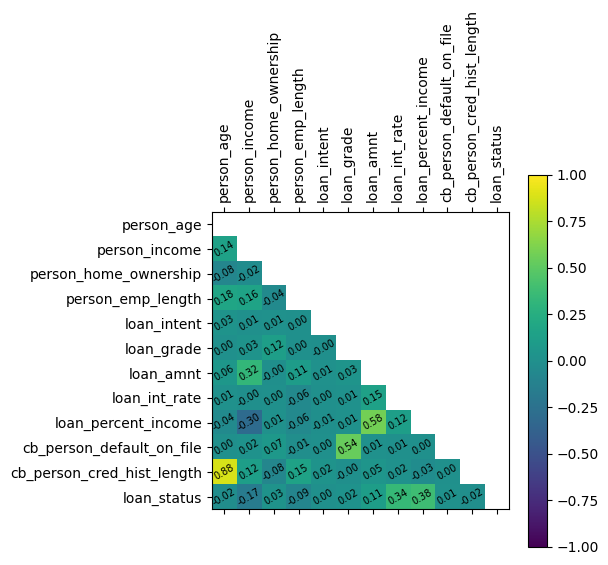

In [49]:
correlation = df_all_data.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient().highlight_null(color='#f1f1f1')

plt.matshow(correlation, vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', size=7, rotation=30)

plt.savefig('all_predictor_correlation.pdf', bbox_inches='tight')
None


In [50]:
df_all_data_meaningful = df_all_data[
    [
        'person_age',
        'person_income',
        'person_emp_length',
        'loan_grade',
        'loan_amnt',
        'loan_int_rate',
        'loan_percent_income',
        'cb_person_default_on_file',
        'cb_person_cred_hist_length',
        'loan_status',
    ]
]

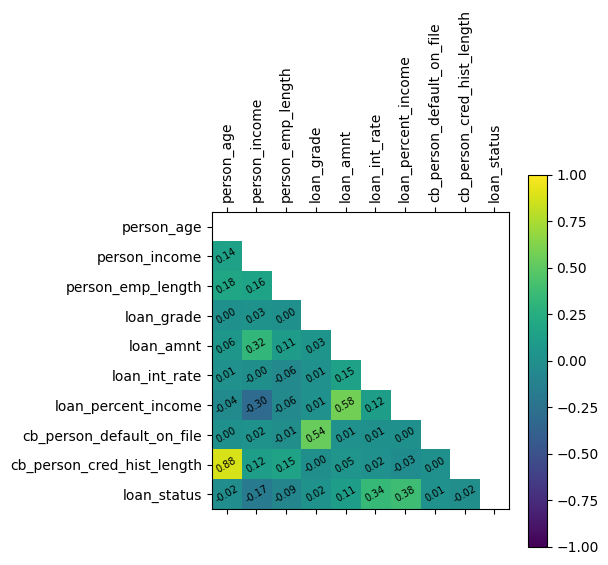

In [51]:
correlation = df_all_data_meaningful.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient().highlight_null(color='#f1f1f1')

plt.matshow(correlation, vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', size=7, rotation=30)

plt.savefig('all_meaningful_predictor_correlation.pdf', bbox_inches='tight')
None
